In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
# Read the data - proteins, mutations and PTMs
protein = pd.read_csv('../db_tables/protein.tsv', sep= '\t')
mutation = pd.read_csv('../db_tables/mutation_new.tsv.gz', sep= '\t', compression= 'gzip')

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# PTMs tables
ptm = pd.read_csv('../db_tables/ptm.tsv', sep ='\t')
class_ptm = pd.read_csv('../db_tables/class_ptm.tsv', sep='\t')
type_ptm = pd.read_csv('../db_tables/type_ptm.tsv', sep='\t')

In [4]:
type_ptm

,type,id_type
0,Phosphorylation,1
1,Acetylation,2
2,O-GalNAc,3
3,Methylation,4
4,Sumoylation,5
5,Ubiquitination,6
6,O-GlcNAc,7


In [5]:
ptm['mod'].value_counts()

p     94547
ub    44739
ac    12414
m1     7878
sm     3872
m2     1230
ga      281
gl      217
m3      155
me      146
pa        2
ng        2
sc        1
Name: mod, dtype: int64

**Modifications abbreviations**  
- me: methylation  
- me1: mono-methylation
- me2: di-methylation
- me3: tri-methylation
- p: Phosphorylation 
- ac: Acetylation
- ub: Ubiquitylation
- sm: sumoylation
- ga: O-GalNAc
- gl: O-GlcNAc
- ng: N-Glycosylation
- pa: palmitoylation
- sc: succinylation


# Dataframe with no. of ptms and mutations by proteins position

In [6]:
id_protein = protein[['id_protein', 'uniprot_acc', 'uniprot_name']]
id_protein

,id_protein,uniprot_acc,uniprot_name
0,1,P35637,FUS_HUMAN
1,2,Q06787,FMR1_HUMAN
2,3,Q92804,RBP56_HUMAN
3,4,Q13148,TADBP_HUMAN
4,5,Q01844,EWS_HUMAN
...,...,...,...
5736,5737,Q9Y6R4,M3K4_HUMAN
5737,5738,Q9Y6S9,RPKL1_HUMAN
5738,5739,Q9Y6U7,RN215_HUMAN
5739,5740,Q9Y6W6,DUS10_HUMAN


In [7]:
# Subset only to be used cols
muts = mutation[['id_protein', 'id_mutation', 'start_aa', 'end_aa', 'notation_aa']]
muts

,id_protein,id_mutation,start_aa,end_aa,notation_aa
0,3155,1,442,442,p.Y442=
1,3155,2,480,480,p.S480=
2,3155,3,500,500,p.A500=
3,3155,4,503,503,p.S503=
4,3155,5,69,69,p.P69=
...,...,...,...,...,...
1660054,4349,1660055,337,337,p.A337S
1660055,4361,1660056,26,26,p.E26K
1660056,4361,1660057,215,215,p.S215N
1660057,4362,1660058,400,400,p.Y400N


In [8]:
muts.duplicated().any()

False

In [9]:
# Mutations on ranges, eg. delins
muts_ranges = muts[muts.end_aa - muts.start_aa > 0]
muts_ranges.shape

(8331, 5)

In [10]:
len(muts) - len(muts_ranges)

1651728

In [11]:
# Keep by the moment point mutations
muts = muts[~muts.index.isin(muts_ranges.index)]

In [12]:
# No. of mutations by each protein residue
muts.groupby(['id_protein', 'start_aa'])['id_mutation'].size().sort_values(ascending= False)

id_protein  start_aa
5368        288         58
798         247         35
5368        290         35
798         234         34
            233         32
                        ..
2170        4818         1
            4822         1
            4824         1
            4832         1
5741        2805         1
Name: id_mutation, Length: 1233647, dtype: int64

In [13]:
def check_muts(df, id_prot, pos):
    return df[(df.id_protein == id_prot) & (df.start_aa == pos)]

In [14]:
check_muts(muts, 798, 247)

,id_protein,id_mutation,start_aa,end_aa,notation_aa
19825,798,19826,247,247,p.L247=
70518,798,70519,247,247,p.L247fs
70549,798,70550,247,247,p.L247fs
70601,798,70602,247,247,p.L247fs
129956,798,129957,247,247,p.L247S
214813,798,214814,247,247,p.L247*
214842,798,214843,247,247,p.L247*
455395,798,455396,247,247,p.L247=
591991,798,591992,247,247,p.L247Pfs*10
592055,798,592056,247,247,p.L247Cfs*4


In [15]:
# The mutations are different at genomic level, but may have the same effect on the protein
#mutation[(mutation.id_protein == 798) & (mutation.start_aa == 247)]

## Two approaches

### 1. Count by mutated site (yes or no)

In [16]:
# Drop the mutations that are the same
muts_unique = muts[['id_protein',	'start_aa',	'notation_aa']].drop_duplicates()
muts_unique.shape

(1619917, 3)

In [17]:
muts_unique.groupby(['id_protein', 'start_aa']).size().sort_values(ascending= False)

id_protein  start_aa
798         234         30
            247         26
            233         25
3463        1113        23
75          157         21
                        ..
2166        102          1
            103          1
            106          1
            109          1
5741        2805         1
Length: 1233647, dtype: int64

In [18]:
#check_muts(muts_unique, 798, 234) # Ok, now they are all unique

In [19]:
# Group by mutated position
# this df has each mutated residue for each protein (independently of the number of muts per residue)
muts_unique_group = muts_unique.groupby(['id_protein', 'start_aa']).size().reset_index().rename(columns={'start_aa': 'pos_aa'}).drop(columns=0)
muts_unique_group

,id_protein,pos_aa
0,1,3
1,1,5
2,1,10
3,1,11
4,1,14
...,...,...
1233642,5741,2797
1233643,5741,2798
1233644,5741,2800
1233645,5741,2803


### 2. Count no. of mutations per residue

In [20]:
muts_count = muts.groupby(['id_protein', 'start_aa'])['id_mutation'].size().sort_values(ascending= False).reset_index().rename(columns= {'start_aa': 'pos_aa', 'id_mutation': 'num_muts'})
muts_count

,id_protein,pos_aa,num_muts
0,5368,288,58
1,798,247,35
2,5368,290,35
3,798,234,34
4,798,233,32
...,...,...,...
1233642,2170,4818,1
1233643,2170,4822,1
1233644,2170,4824,1
1233645,2170,4832,1


---

# PTMs

In [21]:
# How many PTMs by each protein residue
ptm.groupby(['id_protein', 'pos_aa'])['id_ptm'].size().sort_values(ascending= False)

id_protein  pos_aa
490         4         12
            79        12
            36        11
            9         11
            27        11
                      ..
1341        19         1
            17         1
            8          1
1340        521        1
5741        2775       1
Name: id_ptm, Length: 147645, dtype: int64

In [23]:
# Some PTMs are the same. The difference is the class of PTM (general, regulatory, disease)
ptm[(ptm.id_protein == 490) & (ptm.pos_aa == 4)]

,pos_aa,aa,mod,id_protein,id_class,id_type,id_ptm
23320,4,K,me,490,2,4.0,23321
23331,4,K,m2,490,2,4.0,23332
23336,4,K,ac,490,1,2.0,23337
23347,4,K,m1,490,2,4.0,23348
23368,4,K,m2,490,3,4.0,23369
23376,4,K,me,490,1,4.0,23377
23377,4,K,m3,490,1,4.0,23378
23378,4,K,m1,490,1,4.0,23379
23379,4,K,m2,490,1,4.0,23380
23386,4,K,ac,490,2,2.0,23387


In [24]:
class_ptm

,class,id_class
0,general,1
1,regulatory,2
2,disease,3


In [25]:
# Quizas luego analizar las tipo disease separadas
ptm.id_class.value_counts()

1    159495
2      5345
3       644
Name: id_class, dtype: int64

In [26]:
id_protein[id_protein.id_protein == 490]

,id_protein,uniprot_acc,uniprot_name
489,490,P68431,H31_HUMAN


In [22]:
ptm.drop(columns= ['id_class', 'id_ptm']).duplicated().sum()

5982

In [23]:
# Drop the class col in ptm table to avoid duplicates
num = ptm.drop(columns= ['id_class', 'id_ptm']).duplicated().sum()
print(f'dropped {(num)} duplicated PTMs')

dropped 5982 duplicated PTMs


In [24]:
ptm_unique = ptm.drop(columns= ['id_class', 'id_ptm']).drop_duplicates()

In [25]:
ptm_unique

,pos_aa,aa,mod,id_protein,id_type
0,42,S,p,1,1.0
1,439,S,p,1,1.0
2,462,S,p,1,1.0
3,468,Y,p,1,1.0
4,526,Y,p,1,1.0
...,...,...,...,...,...
165479,208,S,p,5741,1.0
165480,182,S,p,5741,1.0
165481,172,S,p,5741,1.0
165482,2491,S,p,5741,1.0


In [26]:
# How many PTMs by each protein residue
ptm_unique_counts = ptm_unique.groupby(['id_protein', 'pos_aa']).size().sort_values(ascending= False).reset_index().rename(columns= {0: 'num_ptms'})
ptm_unique_counts

,id_protein,pos_aa,num_ptms
0,490,79,7
1,490,14,7
2,4415,20,6
3,490,56,6
4,4089,55,6
...,...,...,...
147640,1316,290,1
147641,1316,238,1
147642,1316,128,1
147643,1316,108,1


In [32]:
# check
ptm_unique[(ptm_unique.id_protein == 490) & (ptm_unique.pos_aa == 79)] # ok

,pos_aa,aa,mod,id_protein,id_type
23321,79,K,me,490,4.0
23349,79,K,ac,490,2.0
23392,79,K,m2,490,4.0
23398,79,K,m1,490,4.0
23423,79,K,ub,490,6.0
23430,79,K,m3,490,4.0
23442,79,K,sm,490,5.0


# Analize the effect of mutations in PTM sites in drivers proteins
### see the effect in IDRs as well

In [27]:
ptm_unique

,pos_aa,aa,mod,id_protein,id_type
0,42,S,p,1,1.0
1,439,S,p,1,1.0
2,462,S,p,1,1.0
3,468,Y,p,1,1.0
4,526,Y,p,1,1.0
...,...,...,...,...,...
165479,208,S,p,5741,1.0
165480,182,S,p,5741,1.0
165481,172,S,p,5741,1.0
165482,2491,S,p,5741,1.0


In [28]:
muts_unique

,id_protein,start_aa,notation_aa
0,3155,442,p.Y442=
1,3155,480,p.S480=
2,3155,500,p.A500=
3,3155,503,p.S503=
4,3155,69,p.P69=
...,...,...,...
1660054,4349,337,p.A337S
1660055,4361,26,p.E26K
1660056,4361,215,p.S215N
1660057,4362,400,p.Y400N


In [29]:
# Bring proteins roles
protein_has_mlo = pd.read_csv('../db_tables/protein_has_mlo.tsv', sep= '\t')
rol = pd.read_csv('../db_tables/rol.tsv', sep= '\t')

In [30]:
def list_roles(protein_has_mlo, id_rol):
    '''
    id_rol: 1 for driver, 2 for regulator, 3 for client
    returns a list with the protein ids with that role
    '''
    rol = protein_has_mlo[['id_protein', 'id_rol']].dropna()
    rol = rol[rol.id_rol == id_rol].drop_duplicates()

    return list(rol.id_protein)

In [31]:
# keep only rol col and drop the unassigned
drivers = protein_has_mlo[['id_protein', 'id_rol']].dropna()
drivers = drivers[drivers.id_rol == 1].drop_duplicates()
drivers.id_rol = drivers.id_rol.apply(int)

In [32]:
drivers.shape

(285, 2)

In [33]:
def role_dataset(prot_df, prot_ids):
    '''
    prot_df: a dataframe with all the proteins entries
    prot_ids: list or series with proteins ids
    '''
    df = prot_df[prot_df.id_protein.isin(prot_ids)]
    return df[['id_protein', 'uniprot_acc', 'length', 'disorder_content', 'sequence']]

In [34]:
# First, select driver proteins
drivers = protein[protein.id_protein.isin(drivers.id_protein)]
drivers = drivers[['id_protein', 'uniprot_acc', 'length', 'disorder_content', 'sequence']]
# change and use the function

In [35]:
drivers

,id_protein,uniprot_acc,length,disorder_content,sequence
0,1,P35637,526,0.797,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...
1,2,Q06787,632,0.340,MEELVVEVRGSNGAFYKAFVKDVHEDSITVAFENNWQPDRQIPFHD...
2,3,Q92804,592,0.828,MSDSGSYGQSGGEQQSYSTYGNPGSQGYGQASQSYSGYGQTTDSSY...
3,4,Q13148,414,0.184,MSEYIRVTEDENDEPIEIPSEDDGTVLLSTVTAQFPGACGLRYRNP...
4,5,Q01844,656,0.649,MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQ...
...,...,...,...,...,...
5367,5368,P06748,294,NaN,MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRT...
5518,5519,Q8WXF1,523,0.122,MMLRGNLKQVRIEKNPARLRALESAVGESEPAAAAAMALALAGEPA...
5526,5527,Q53HL2,280,0.143,MAPRKGSSRVAKTNSLRRRKLASFLKDFDREVEIRIKQIESDRQNL...
5664,5665,Q9UQ35,2752,0.868,MYNGIGLPTPRGSGTNGYVQRNLSLVRGRRGERPDYKGEEELRRLE...


<AxesSubplot:>

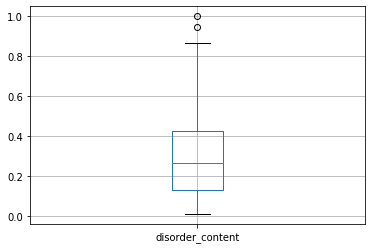

In [42]:
drivers[['disorder_content']].boxplot()

In [36]:
# Second, look for PTMS in driver proteins
ptm_drivers_count = ptm_unique_counts[ptm_unique_counts.id_protein.isin(drivers.id_protein)]

In [37]:
# Third, the mutations in the driver proteins
muts_drivers_count = muts_count[muts_count.id_protein.isin(drivers.id_protein)]

In [38]:
ptm_mut_drivers = ptm_drivers_count.merge(muts_drivers_count, on= ['id_protein', 'pos_aa'])
ptm_mut_drivers

,id_protein,pos_aa,num_ptms,num_muts
0,490,79,7,2
1,490,14,7,2
2,490,56,6,1
3,490,36,6,1
4,490,27,6,4
...,...,...,...,...
4429,1298,630,1,1
4430,1298,604,1,2
4431,1298,583,1,1
4432,1298,567,1,1


In [46]:
ptm_mut_drivers["ptms/muts"] = (ptm_mut_drivers.num_ptms / ptm_mut_drivers.num_muts)

<AxesSubplot:>

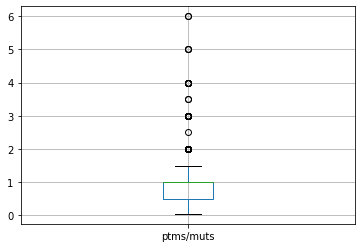

In [47]:
ptm_mut_drivers[['ptms/muts']].boxplot()

In [48]:
ptm_mut_drivers.num_muts.corr(ptm_mut_drivers.num_ptms)

0.014931161438498666

<AxesSubplot:>

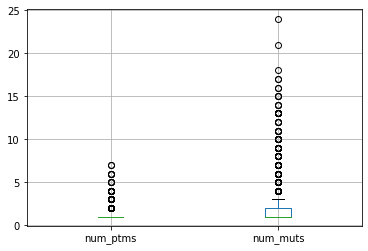

In [49]:
ptm_mut_drivers[['num_ptms', 'num_muts']].boxplot()

<AxesSubplot:>

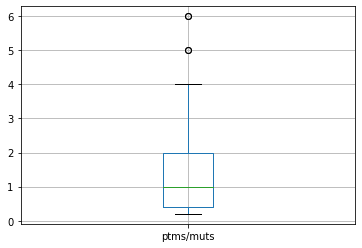

In [50]:
# example in one protein
ptm_mut_drivers[ptm_mut_drivers.id_protein == 490].sort_values('pos_aa')[['ptms/muts']].boxplot()

In [39]:
# There are 211 driver proteins with PTMs and mutations
ptm_mut_drivers.groupby('id_protein').size()

id_protein
1        36
2        11
3         2
4        14
5        33
       ... 
5368     28
5519      7
5527     10
5665    251
5685      1
Length: 211, dtype: int64

# Compare: disordered regions vs no-disordered regions in proteins by role.
-- threshold 30%

## First, disorder content

In [40]:
drivers

,id_protein,uniprot_acc,length,disorder_content,sequence
0,1,P35637,526,0.797,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...
1,2,Q06787,632,0.340,MEELVVEVRGSNGAFYKAFVKDVHEDSITVAFENNWQPDRQIPFHD...
2,3,Q92804,592,0.828,MSDSGSYGQSGGEQQSYSTYGNPGSQGYGQASQSYSGYGQTTDSSY...
3,4,Q13148,414,0.184,MSEYIRVTEDENDEPIEIPSEDDGTVLLSTVTAQFPGACGLRYRNP...
4,5,Q01844,656,0.649,MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQ...
...,...,...,...,...,...
5367,5368,P06748,294,NaN,MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRT...
5518,5519,Q8WXF1,523,0.122,MMLRGNLKQVRIEKNPARLRALESAVGESEPAAAAAMALALAGEPA...
5526,5527,Q53HL2,280,0.143,MAPRKGSSRVAKTNSLRRRKLASFLKDFDREVEIRIKQIESDRQNL...
5664,5665,Q9UQ35,2752,0.868,MYNGIGLPTPRGSGTNGYVQRNLSLVRGRRGERPDYKGEEELRRLE...


In [41]:
# List with regulator proteins
reg = list_roles(protein_has_mlo, 2)

In [42]:
regulators = role_dataset(protein, reg)
regulators.shape

(357, 5)

In [43]:
# clients
cl = list_roles(protein_has_mlo, 3)
clients = role_dataset(protein, cl)
clients.shape

(3175, 5)

In [44]:
clients.disorder_content.isna().sum()

1283

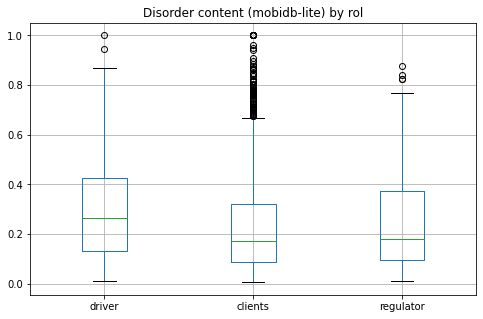

In [45]:
# Plot the disorder content by protein role
dc = {
    'driver': drivers.disorder_content,
    'clients': clients.disorder_content,
    'regulator': regulators.disorder_content
    
}
plt.figure(figsize= (8,5))
pd.DataFrame(dc).boxplot()
plt.title("Disorder content (mobidb-lite) by rol")
plt.show()

## mutated disordered aa vs no-disordered aa by protein role

### How many mutations in driver proteins

In [46]:
# Load disorder data
disorder_region = pd.read_csv('../db_tables/disorder_region.tsv', sep= '\t')
mutation_has_disorder_region = pd.read_csv('../db_tables/mutation_has_disorder_region.tsv', sep= '\t')

In [47]:
# Subset mutations in driver proteins
driver_mutations = mutation[mutation.id_protein.isin(drivers.id_protein)][['id_protein', 'id_mutation', 'start_aa']].drop_duplicates() # ok, no duplicated

In [48]:
# Driver proteins length
driver_length= protein[protein.id_protein.isin(drivers.id_protein)][['id_protein', 'length']]

In [49]:
# No of driver mutations
no_driver_mut = driver_mutations.id_mutation.nunique()
no_driver_mut

116083

In [50]:
# Add length of proteins
driver_mutations = driver_mutations.merge(driver_length).rename(columns= {'length': 'prot_length'})
driver_mutations

,id_protein,id_mutation,start_aa,prot_length
0,1628,102,1705,1710
1,1628,103,1638,1710
2,1628,104,1619,1710
3,1628,105,1433,1710
4,1628,106,1143,1710
...,...,...,...,...
116078,3456,1658328,563,338
116079,3456,1658329,232,338
116080,3456,1658330,377,338
116081,3456,1658331,489,338


In [51]:
# df with IDRs in driver proteins
idr_drivers = disorder_region[disorder_region.id_protein.isin(drivers.id_protein)].rename(columns= {'length': 'idr_length'})
idr_drivers

,start,end,id_idr,idr_length,id_protein
0,1,286,7538,286,1
1,375,424,7539,50,1
2,444,526,7540,83,1
3,325,349,7467,25,2
4,443,632,7468,190,2
...,...,...,...,...,...
8375,460,523,2749,64,5519
8386,130,169,5935,40,5527
8570,2389,2752,4385,364,5665
8571,2311,2342,4384,32,5665


In [52]:
# How many driver proteins have idrs?
idr_drivers.id_protein.nunique()

219

In [53]:
# Proportion of IDR aa in driver proteins
idr_drivers.idr_length.sum() / drivers.length.sum()

0.2609033367701249

---

#### Drivers: Rate no. of mutated aa/ no. of total aa

In [54]:
# Merge the mutations and the idrs
mutations_idr_drivers = driver_mutations[['id_protein',	'id_mutation',	'start_aa']].merge(
    idr_drivers[['id_idr', 'id_protein', 'start',	'end']]
)
mutations_idr_drivers

,id_protein,id_mutation,start_aa,id_idr,start,end
0,1628,102,1705,6369,108,139
1,1628,102,1705,6370,587,611
2,1628,102,1705,6371,1120,1142
3,1628,102,1705,6368,39,79
4,1628,102,1705,6367,1,27
...,...,...,...,...,...,...
616044,3456,1658328,563,1053,1,40
616045,3456,1658329,232,1053,1,40
616046,3456,1658330,377,1053,1,40
616047,3456,1658331,489,1053,1,40


In [55]:
# Now select those mutations that falls in idr regions
mutations_idr_drivers['in_idr'] = False
for ix in mutations_idr_drivers.index:
    if mutations_idr_drivers.start_aa[ix] in range(mutations_idr_drivers.start[ix], mutations_idr_drivers.end[ix] + 1):
        mutations_idr_drivers.in_idr[ix] = True

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
# mutations in Driver proteins that does not falls into IDR regions
mutations_no_idr_drivers = mutations_idr_drivers[mutations_idr_drivers.in_idr == False]
mutations_no_idr_drivers.shape

(581236, 7)

In [57]:
# mutations in Driver proteins that falls into IDR regions
mutations_idr_drivers = mutations_idr_drivers[mutations_idr_drivers.in_idr == True]
mutations_idr_drivers.shape

(34813, 7)

In [58]:
# How many mutated aa in non-IDR drivers?
no_idr_driver_mut_aa = mutations_no_idr_drivers[['id_protein', 'start_aa']].drop_duplicates().sort_values(["id_protein", "start_aa"])
no_idr_driver_mut_aa

,id_protein,start_aa
434046,1,3
433770,1,5
433617,1,10
433365,1,11
433434,1,14
...,...,...
521829,5665,2739
520125,5665,2742
522615,5665,2747
521901,5665,2748


In [59]:
# How many mutated aa in IDR drivers?
idr_driver_mut_aa = mutations_idr_drivers[['id_protein', 'start_aa']].drop_duplicates().sort_values(["id_protein", "start_aa"])
idr_driver_mut_aa

,id_protein,start_aa
434045,1,3
433769,1,5
433616,1,10
433364,1,11
433433,1,14
...,...,...
521828,5665,2739
520124,5665,2742
522614,5665,2747
521900,5665,2748


In [60]:
# total no. of drivers aa in IDRs
idr_drivers.idr_length.sum()

56430

In [61]:
# total no. of drivers aa non-IDRs
drivers.length.sum() - idr_drivers.idr_length.sum()

159857

For each protein role, the rate of mutated idr aa / total idr aa

In [62]:
# Mutations in IDR drivers
# No. mutated idr drivers aa / no. total of idr driver aa
rate_driver_idr = round(idr_driver_mut_aa.shape[0] / idr_drivers.idr_length.sum(), 2)
rate_driver_idr

0.4

In [63]:
# Mutations in non IDR drivers
rate_driver_no_idr = round(no_idr_driver_mut_aa.shape[0] / (drivers.length.sum() - idr_drivers.idr_length.sum()), 2)
rate_driver_no_idr

0.39

---

In [64]:
driver_mutations

,id_protein,id_mutation,start_aa,prot_length
0,1628,102,1705,1710
1,1628,103,1638,1710
2,1628,104,1619,1710
3,1628,105,1433,1710
4,1628,106,1143,1710
...,...,...,...,...
116078,3456,1658328,563,338
116079,3456,1658329,232,338
116080,3456,1658330,377,338
116081,3456,1658331,489,338


In [65]:
# Consider only mutated position (no number of mutations)
mutated_driver_aa = driver_mutations[['id_protein', 'start_aa']].drop_duplicates().sort_values(["id_protein", "start_aa"])
mutated_driver_aa # this is the total number of mutated driver residues

,id_protein,start_aa
45543,1,3
45451,1,5
45400,1,10
45316,1,11
45339,1,14
...,...,...
50669,5685,107
50674,5685,109
50656,5685,110
50653,5685,112


In [66]:
idr_driver_mut_aa

,id_protein,start_aa
434045,1,3
433769,1,5
433616,1,10
433364,1,11
433433,1,14
...,...,...
521828,5665,2739
520124,5665,2742
522614,5665,2747
521900,5665,2748


In [67]:
# From here, exclude those mutations in IDRs
mutated_driver_aa[mutated_driver_aa.isin(idr_driver_mut_aa)]



,id_protein,start_aa
45543,NaN,NaN
45451,NaN,NaN
45400,NaN,NaN
45316,NaN,NaN
45339,NaN,NaN
...,...,...
50669,NaN,NaN
50674,NaN,NaN
50656,NaN,NaN
50653,NaN,NaN


---

In [68]:
# Total of drivers aa
drivers.length.sum()

216287

In [69]:
# Mutations all drivers
# No. mutated drivers aa / no. total of driver aa
rate_driver_all = round(mutated_driver_aa.shape[0] / drivers.length.sum(), 2)
rate_driver_all

0.36

new: in all, exclude the aa and mutations in IDRs

---

#### Clients: Rate no. of mutated aa/ no. of total aa

In [70]:
clients

,id_protein,uniprot_acc,length,disorder_content,sequence
45,46,P26368,475,NaN,MSDFDEFERQLNENKQERDKENRHRKRSHSRSRSRDRKRRSRSRDR...
47,48,Q9Y5A9,579,0.321,MSASSLLEQRPKGQGNKVQNGSVHQKDGLNDDDFEPYLSPQARPNN...
48,49,Q9BYJ9,559,0.315,MSATSVDTQRTKGQDNKVQNGSLHQKDTVHDNDFEPYLTGQSNQSN...
49,50,Q7Z739,585,0.232,MSATSVDQRPKGQGNKVSVQNGSIHQKDAVNDDDFEPYLSSQTNQS...
50,51,Q8NE35,698,0.236,MQDDLLMDKSKTQPQPQQQQRQQQQPQPESSVSEAPSTPLSSETPK...
...,...,...,...,...,...
5684,5685,P0DPB6,133,NaN,MEEDQELERKISGLKTSMAEGERKTALEMVQAAGTDRHCVTFVLHE...
5689,5690,Q9NTM9,273,NaN,MKRQGASSERKRARIPSGKAGAANGFLMEVCVDSVESAVNAERGGA...
5707,5708,Q8NC51,408,0.836,MPGHLQEGFGCVVTNRFDQLFDDESDPFEVLKAAENKKKEAGGGGV...
5726,5727,Q7L014,1031,NaN,MGRESRHYRKRSASRGRSGSRSRSRSPSDKRSKRGDDRRSRSRDRD...


In [143]:
# No. total of client aa
clients.length.sum()

2144249

In [71]:
# Bring all the mutations in client proteins
all_client_mutations = mutation[mutation.id_protein.isin(clients.id_protein)][['id_protein', 'id_mutation', 'start_aa']]
# Add protein length
all_client_mutations = all_client_mutations.merge(protein[['id_protein', 'length']])
all_client_mutations

,id_protein,id_mutation,start_aa,length
0,3155,1,442,559
1,3155,2,480,559
2,3155,3,500,559
3,3155,4,503,559
4,3155,5,69,559
...,...,...,...,...
963369,3376,1658143,809,353
963370,3376,1658144,297,353
963371,3376,1658145,333,353
963372,3376,1658146,615,353


In [72]:
all_client_mutations.id_mutation.duplicated().any()

False

In [73]:
# Bring all the IDR in client proteins
idr_client = disorder_region[disorder_region.id_protein.isin(clients.id_protein)]
# Add the mutations in IDRs
idr_client = idr_client.merge(mutation_has_disorder_region).sort_values('id_mutation')
# Add the mutations positions
idr_client = idr_client.merge(mutation[['id_mutation', 'start_aa']])
idr_client

,start,end,id_idr,length,id_protein,id_mutation,start_aa
0,39,79,6368,41,1628,114,62
1,1,27,6367,27,1628,115,20
2,1120,1142,6371,23,1628,122,1126
3,1,27,6367,27,1628,137,22
4,84,103,3841,20,1659,151,89
...,...,...,...,...,...,...,...
138526,713,1034,4053,322,5444,1645891,821
138527,713,1034,4053,322,5444,1645893,968
138528,1,79,6808,79,2148,1645957,77
138529,176,199,2651,24,2063,1645986,193


In [74]:
# Control
idr_client["ctrl"] = False
for ix in idr_client.index:
    if idr_client.start_aa[ix] in range(idr_client.start[ix], idr_client.end[ix] + 1):
        idr_client.ctrl[ix] = True

idr_client.ctrl.sum() # 138473

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


138473

In [75]:
idr_client = idr_client[idr_client.ctrl == True]

In [76]:
idr_client.duplicated().any()

False

In [77]:
idr_client.id_mutation.nunique() # ok!

138473

Rates

In [78]:
# total of clients aa
total_client_idr_aa = idr_client[['id_idr', 'length']].drop_duplicates().length.sum()
total_client_idr_aa

296060

In [79]:
# mutated clients aa
idr_client.shape[0]

138473

In [80]:
# Mutations in IDR
# No. mutated idr clients aa / no. total of idr clients aa
rate_client_idr = round(idr_client.shape[0] / total_client_idr_aa, 2)
rate_client_idr

0.47

In [81]:
idr_client

,start,end,id_idr,length,id_protein,id_mutation,start_aa,ctrl
0,39,79,6368,41,1628,114,62,True
1,1,27,6367,27,1628,115,20,True
2,1120,1142,6371,23,1628,122,1126,True
3,1,27,6367,27,1628,137,22,True
4,84,103,3841,20,1659,151,89,True
...,...,...,...,...,...,...,...,...
138526,713,1034,4053,322,5444,1645891,821,True
138527,713,1034,4053,322,5444,1645893,968,True
138528,1,79,6808,79,2148,1645957,77,True
138529,176,199,2651,24,2063,1645986,193,True


In [82]:
# Now all non idr clients aa
all_client_mutated_aa = all_client_mutations.drop_duplicates(['id_protein', 'start_aa'])
all_client_mutated_aa

,id_protein,id_mutation,start_aa,length
0,3155,1,442,559
1,3155,2,480,559
2,3155,3,500,559
3,3155,4,503,559
4,3155,5,69,559
...,...,...,...,...
963369,3376,1658143,809,353
963370,3376,1658144,297,353
963371,3376,1658145,333,353
963372,3376,1658146,615,353


In [83]:
# No. of non IDR mutations in client proteins
no_idr_mutated_client_aa = all_client_mutated_aa.shape[0] - idr_client.shape[0]
no_idr_mutated_client_aa

579081

In [84]:
# No. of non IDR clients aa
no_idr_client_aa = clients.length.sum() - idr_client[['id_idr', 'length']].drop_duplicates().length.sum()
no_idr_client_aa

1848189

In [85]:
# Non IDR mutation rate clientsrate_regulator_non_idr
rate_clients_non_idr = round(no_idr_mutated_client_aa / no_idr_client_aa, 2)
rate_clients_non_idr

0.31

In [86]:
# Now mutations in all clients aa
# No of unique mutated aa in client proteins
_ = all_client_mutations.drop_duplicates(['id_protein', 'start_aa'])
mutated_client_aa = _.shape[0]

In [87]:
total_client_aa = all_client_mutations[['id_protein', 'length']].drop_duplicates().length.sum()

In [88]:
# Mutations all clients
# No. mutated clients aa / no. total of client aa
rate_client_all = round(mutated_client_aa / total_client_aa, 2)
rate_client_all

0.34

---

#### Regulators: Rate no. of mutated aa/ no. of total aa

In [89]:
regulators

,id_protein,uniprot_acc,length,disorder_content,sequence
15,16,Q16082,182,NaN,MSGRSVPHAHPATAEYEFANPSRLGEQRFGEGLLPEEILTPTLYHG...
38,39,P03372,595,0.131,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...
39,40,O43781,588,0.116,MGGTARGPGRKDAGPPGAGLPPQQRRLGDGVYDTFMMIDETKCPPC...
44,45,P43243,847,0.365,MSKSFQQSSLSRDSQGHGRDLSAAGIGLLAAATQSLSMPASLGRMN...
46,47,Q14149,939,0.053,MAAQPPRGIRLSALCPKFLHTNSTSHTWPFSAVAELIDNAYDPDVN...
...,...,...,...,...,...
4537,4538,P84090,104,NaN,MSHTILLVQPTKRPEGRTYADYESVNECMEGVCKMYEEHLKRMNPN...
4852,4853,Q9Y2L1,958,0.022,MLKSKTFLKKTRAGGVMKIVREHYLRDDIGCGAPGCAACGGAHEGP...
5133,5134,P63165,101,NaN,MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...
5217,5218,Q15020,963,0.241,MATAAETSASEPEAESKAGPKADGEEDEVKAARTRRKVLSRAVAAA...


In [90]:
# Bring all the mutations in regulator proteins
all_regulator_mutations = mutation[mutation.id_protein.isin(regulators.id_protein)][['id_protein', 'id_mutation', 'start_aa']]
# Add protein length
all_regulator_mutations = all_regulator_mutations.merge(protein[['id_protein', 'length']])
all_regulator_mutations

,id_protein,id_mutation,start_aa,length
0,93,1329,108,364
1,93,1330,52,364
2,93,1331,253,364
3,93,1332,103,364
4,93,1333,125,364
...,...,...,...,...
123166,346,1647809,1083,2024
123167,351,1647818,463,2896
123168,351,1647819,615,2896
123169,372,1647884,314,1732


In [91]:
all_regulator_mutations.id_mutation.duplicated().any()

False

In [92]:
# Bring all the IDR in regulator proteins
idr_regulator = disorder_region[disorder_region.id_protein.isin(regulators.id_protein)]
idr_regulator

,start,end,id_idr,length,id_protein
78,259,286,7246,28,39
79,553,573,7247,21,39
80,146,174,7245,29,39
81,1,27,7040,27,40
82,97,137,7041,41,40
...,...,...,...,...,...
7942,50,90,3754,41,5218
7943,920,948,3757,29,5218
7944,590,694,3755,105,5218
7945,878,898,3756,21,5218


In [97]:
#mutation_has_disorder_region[mutation_has_disorder_region.id_idr.isin(idr_regulator.id_idr)] # 21598, is ok

In [93]:
# Add the mutations in IDRs
idr_regulator = idr_regulator.merge(mutation_has_disorder_region).sort_values('id_mutation')
# Add the mutations positions
idr_regulator = idr_regulator.merge(mutation[['id_mutation', 'start_aa']])
idr_regulator

,start,end,id_idr,length,id_protein,id_mutation,start_aa
0,459,560,3297,102,402,1374,560
1,191,292,3295,102,402,1375,288
2,191,292,3295,102,402,1379,244
3,390,422,3296,33,402,1380,398
4,191,292,3295,102,402,1382,275
...,...,...,...,...,...,...,...
21593,1,51,5392,51,365,1644503,37
21594,311,527,4658,217,160,1644842,428
21595,311,527,4658,217,160,1644843,436
21596,311,527,4658,217,160,1644845,374


In [94]:
idr_regulator.id_mutation.duplicated().any()

False

In [95]:
def control_range(idr_df):
    # Create control column
    idr_df["ctrl"] = False
    for ix in idr_df.index:
        if idr_df.start_aa[ix] in range(idr_df.start[ix], idr_df.end[ix] + 1):
            idr_df.ctrl[ix] = True

    return f"{idr_df.ctrl.sum()} True of {idr_df.shape[0]} entries"

In [96]:
# Control
control_range(idr_regulator)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'21595 True of 21598 entries'

In [97]:
idr_regulator = idr_regulator[idr_regulator.ctrl == True]

In [98]:
idr_regulator

,start,end,id_idr,length,id_protein,id_mutation,start_aa,ctrl
0,459,560,3297,102,402,1374,560,True
1,191,292,3295,102,402,1375,288,True
2,191,292,3295,102,402,1379,244,True
3,390,422,3296,33,402,1380,398,True
4,191,292,3295,102,402,1382,275,True
...,...,...,...,...,...,...,...,...
21593,1,51,5392,51,365,1644503,37,True
21594,311,527,4658,217,160,1644842,428,True
21595,311,527,4658,217,160,1644843,436,True
21596,311,527,4658,217,160,1644845,374,True


In [99]:
# all_regulator_mutations sacar las regiones IDR
all_regulator_mutations

,id_protein,id_mutation,start_aa,length
0,93,1329,108,364
1,93,1330,52,364
2,93,1331,253,364
3,93,1332,103,364
4,93,1333,125,364
...,...,...,...,...
123166,346,1647809,1083,2024
123167,351,1647818,463,2896
123168,351,1647819,615,2896
123169,372,1647884,314,1732


Rates

In [100]:
# No. of IDR mutations in regulators
n_idr_mutations = idr_regulator.shape[0]
# No. of IDR aa in regulators
n_idr_aa = idr_regulator[['id_idr', 'length']].drop_duplicates().length.sum()

In [101]:
# Rate IDR mutation in regulators
rate_regulator_idr = round(n_idr_mutations / n_idr_aa, 2)
rate_regulator_idr

0.5

In [102]:
# Now all non idr regulators aa
all_regulator_mutated_aa = all_regulator_mutations.drop_duplicates(['id_protein', 'start_aa'])
all_regulator_mutated_aa

,id_protein,id_mutation,start_aa,length
0,93,1329,108,364
1,93,1330,52,364
2,93,1331,253,364
3,93,1332,103,364
4,93,1333,125,364
...,...,...,...,...
123166,346,1647809,1083,2024
123167,351,1647818,463,2896
123168,351,1647819,615,2896
123169,372,1647884,314,1732


In [103]:
# No. of non IDR mutations in regulators proteins
no_idr_mutated_regulator_aa = all_regulator_mutated_aa.shape[0] - idr_regulator.shape[0]
no_idr_mutated_regulator_aa

65757

In [104]:
# No. of non IDR regulator aa
no_idr_regulator_aa = regulators.length.sum() - idr_regulator[['id_idr', 'length']].drop_duplicates().length.sum()
no_idr_regulator_aa

207389

In [105]:
# mutational rate non idr regulators
rate_regulator_non_idr = round(no_idr_mutated_regulator_aa / no_idr_regulator_aa, 2)
rate_regulator_non_idr

0.32

---

In [106]:
# total no. of mutations in regulators
total_regulator_mutations = all_regulator_mutations.shape[0]
# total regulator aa
total_regulator_aa = regulators.length.sum()

In [107]:
# Rate all regulators
rate_regulator_all = round(total_regulator_mutations / total_regulator_aa, 2)
rate_regulator_all

0.49

---

### Plot the three groups

In [108]:
roles_dict = {
    "driver": {"all": rate_driver_all, "non_idr": rate_driver_no_idr, "idr": rate_driver_idr},
    "client": {"all": rate_client_all, "non_idr": rate_clients_non_idr, "idr": rate_client_idr},
    "regulator": {"all": rate_regulator_all, "non_idr": rate_regulator_non_idr, "idr": rate_regulator_idr}
}

In [109]:
roles_rates = pd.DataFrame.from_dict(roles_dict)
roles_rates = roles_rates.T
roles_rates

,all,non_idr,idr
driver,0.36,0.39,0.40
client,0.34,0.31,0.47
regulator,0.49,0.32,0.50


<Figure size 432x288 with 0 Axes>

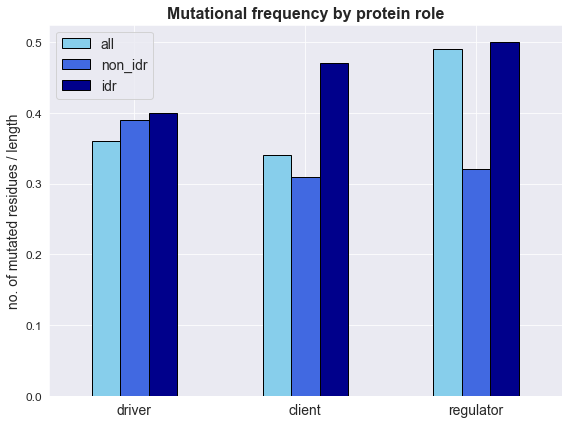

In [110]:
plt.figure()
sns.set_style('darkgrid') # style must be one of white, dark, whitegrid, darkgrid, ticks
fig = roles_rates.plot(kind= 'bar', color= ['skyblue', 'royalblue', 'darkblue'] ,edgecolor= 'black', figsize= (8,6))
plt.title("Mutational frequency by protein role", fontweight= 'bold', fontsize=16)
plt.ylabel("no. of mutated residues / length", size= 14)
plt.yticks(size= 12)
plt.xticks(rotation= 0, size = 14)
plt.legend(fontsize =14)
plt.tight_layout()
#plt.savefig('../plots/mutational_enrichment_protein_role.png', dpi= 300)
plt.show()

In [197]:
# Without all
roles_rates_b = roles_rates.drop(columns="all")

<Figure size 432x288 with 0 Axes>

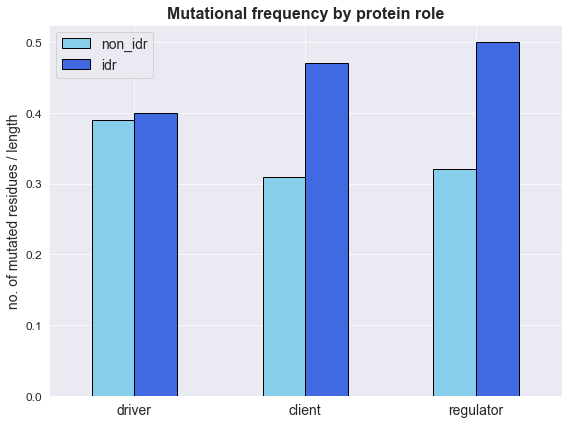

In [198]:
plt.figure()
sns.set_style('darkgrid') # style must be one of white, dark, whitegrid, darkgrid, ticks
fig = roles_rates_b.plot(kind= 'bar', color= ['skyblue', 'royalblue', 'darkblue'] ,edgecolor= 'black', figsize= (8,6))
plt.title("Mutational frequency by protein role", fontweight= 'bold', fontsize=16)
plt.ylabel("no. of mutated residues / length", size= 14)
plt.yticks(size= 12)
plt.xticks(rotation= 0, size = 14)
plt.legend(fontsize =14)
plt.tight_layout()
#plt.savefig('../plots/mutational_enrichment_protein_role.png', dpi= 300)
plt.show()

In [109]:
# Get all possible combinations
from itertools import combinations

In [110]:
roles_rates

,all,idr
driver,0.36,0.40
client,0.34,0.47
regulator,0.49,0.50


In [120]:
pairs = list(combinations(roles_rates.index, r=2))
pairs

[('driver', 'client'), ('driver', 'regulator'), ('client', 'regulator')]

In [ ]:
from statannotations.Annotator import Annotator

ax = sns.boxplot(data=df, x=x, y=y, order=cities)
annotator = Annotator(ax, pairs, data= roles_rates, x= "rol", y= "rate", order= roles_rates.index)
annotator.configure(test="Mann-Whitney")
annotator.apply_and_annotate()
plt.show()

In [124]:
roles_rates.index.to_list()

['driver', 'client', 'regulator']

In [133]:
roles_rates

,all,idr
driver,0.36,0.40
client,0.34,0.47
regulator,0.49,0.50


In [137]:
# https://towardsdatascience.com/statsannotations-add-statistical-significance-annotations-on-seaborn-plots-6b753346a42a
from statannotations.Annotator import Annotator
plt.figure()
sns.set_style('darkgrid') # style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.barplot(x= roles_rates.index.to_list(), y= ["all", "idr"], data= roles_rates)
#fig = roles_rates.plot(kind= 'bar', color= ['skyblue', 'royalblue'] ,edgecolor= 'black', figsize= (8,5))

annotator = Annotator(ax, pairs, data= roles_rates, x= roles_rates.index.to_list(), y= roles_rates, order= roles_rates.index.to_list())
annotator.configure(test="Mann-Whitney")
annotator.apply_and_annotate()

plt.title("Mutational enrichment by protein role", fontweight= 'bold', fontsize=16)
plt.xticks(rotation= 0)
plt.tight_layout()
#plt.savefig('../plots/mutational_enrichment_protein_role.png', dpi= 300)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 0 Axes>

---

# PTMs analysis

In [138]:
from matplotlib_venn import venn3

## One table per protein role, including type of PTM, and compare PTM sites vs PTM mutated sites

In [111]:
protein_roles = protein_has_mlo[['id_protein', 'id_rol']].drop_duplicates().dropna()
protein_roles.id_rol = protein_roles.id_rol.apply(int)
protein_roles

,id_protein,id_rol
0,1,1
21,2,1
41,3,1
52,4,1
72,5,1
...,...,...
11440,5685,1
11449,5690,3
11470,5708,3
11499,5727,3


### Drivers

In [112]:
# First, all the driver proteins
driver_proteins = protein_roles[protein_roles.id_rol == 1]
driver_proteins.shape

(285, 2)

In [113]:
# Second, all the mutated sites in driver proteins
driver_mutations = mutation[mutation.id_protein.isin(driver_proteins.id_protein)][['id_protein', 'start_aa']].drop_duplicates()
driver_mutations.shape

(78692, 2)

In [114]:
driver_mutations.id_protein.nunique() # 279, ok

279

In [115]:
# Third, PTMs in driver proteins
driver_ptms = ptm[ptm.id_protein.isin(driver_proteins.id_protein)][['id_protein', 'pos_aa', 'id_type']].drop_duplicates()
driver_ptms.id_type = driver_ptms.id_type.apply(int)
driver_ptms

,id_protein,pos_aa,id_type
0,1,42,1
1,1,439,1
2,1,462,1
3,1,468,1
4,1,526,1
...,...,...,...
164791,5685,15,6
164792,5685,24,6
164793,5685,119,6
164794,5685,79,6


In [116]:
driver_ptms.duplicated(['id_protein',	'pos_aa']).any()

True

In [117]:
# Now add the column of mutation for each site
driver_ptms = driver_ptms.merge(driver_mutations, left_on=['id_protein', 'pos_aa'], right_on= ['id_protein', 'start_aa'], how='left')
driver_ptms

,id_protein,pos_aa,id_type,start_aa
0,1,42,1,NaN
1,1,439,1,439.0
2,1,462,1,462.0
3,1,468,1,468.0
4,1,526,1,526.0
...,...,...,...,...
14716,5685,15,6,NaN
14717,5685,24,6,NaN
14718,5685,119,6,NaN
14719,5685,79,6,79.0


In [118]:
# replace mutations with boolean condition
cond = driver_ptms.start_aa.notna()
driver_ptms.loc[cond, "start_aa"] = True

In [119]:
driver_ptms

,id_protein,pos_aa,id_type,start_aa
0,1,42,1,NaN
1,1,439,1,True
2,1,462,1,True
3,1,468,1,True
4,1,526,1,True
...,...,...,...,...
14716,5685,15,6,NaN
14717,5685,24,6,NaN
14718,5685,119,6,NaN
14719,5685,79,6,True


In [126]:
# no. of mutated ptm sites
driver_ptms_plot = driver_ptms[['id_type', 'start_aa']].value_counts().reset_index().rename(columns= {0: "mutated_ptm_sites"}).drop(columns= "start_aa")
# count no. of ptm sites by type
_ = driver_ptms.groupby(["id_type"]).size().sort_values().reset_index().rename(columns= {0: "ptm_sites"})
driver_ptms_plot = driver_ptms_plot.merge(_).merge(type_ptm) # add labels (type_ptm)
driver_ptms_plot

,id_type,mutated_ptm_sites,ptm_sites,type
0,1,3011,8584,Phosphorylation
1,6,738,3263,Ubiquitination
2,4,585,1196,Methylation
3,2,314,1150,Acetylation
4,5,108,460,Sumoylation
5,3,14,38,O-GalNAc
6,7,13,30,O-GlcNAc


In [132]:
driver_ptms_plot.set_index("type")[::-1].drop(columns= 'id_type')

,mutated_ptm_sites,ptm_sites
type,,
O-GlcNAc,13,30
O-GalNAc,14,38
Sumoylation,108,460
Acetylation,314,1150
Methylation,585,1196
Ubiquitination,738,3263
Phosphorylation,3011,8584


<AxesSubplot:ylabel='type'>

<Figure size 1008x432 with 0 Axes>

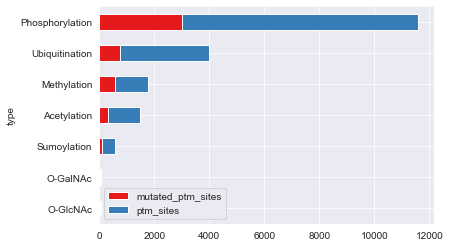

In [135]:
sns.set_palette('Set1')
plt.figure(figsize= (14,6))
driver_ptms_plot.set_index("type")[::-1].drop(columns= 'id_type').plot(kind= 'barh', stacked= True)

In [121]:
driver_ptms_plot = driver_ptms_plot.drop(columns= "id_type").melt(id_vars= ['type'])
driver_ptms_plot

,type,variable,value
0,Phosphorylation,mutated_ptm_sites,3011
1,Ubiquitination,mutated_ptm_sites,738
2,Methylation,mutated_ptm_sites,585
3,Acetylation,mutated_ptm_sites,314
4,Sumoylation,mutated_ptm_sites,108
5,O-GalNAc,mutated_ptm_sites,14
6,O-GlcNAc,mutated_ptm_sites,13
7,Phosphorylation,ptm_sites,8584
8,Ubiquitination,ptm_sites,3263
9,Methylation,ptm_sites,1196


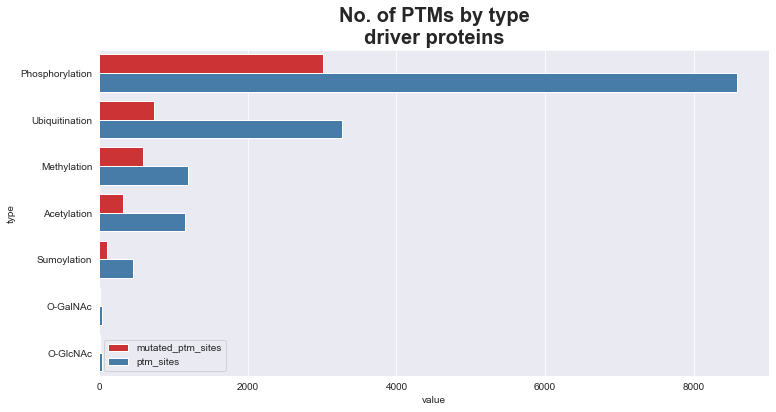

In [122]:
plt.figure(figsize= (12,6))
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.barplot(y= "type", x= "value", hue= "variable", data= driver_ptms_plot)
plt.title("No. of PTMs by type\ndriver proteins", fontsize= 20, fontweight= 'bold')
plt.legend()
plt.show()

### Clients

In [275]:
# First, all the client proteins
client_proteins = protein_roles[protein_roles.id_rol == 3]
client_proteins.shape

(3175, 2)

In [276]:
# Second, all the mutated sites in client proteins
client_mutations = mutation[mutation.id_protein.isin(client_proteins.id_protein)][['id_protein', 'start_aa']].drop_duplicates()
client_mutations.shape

(717554, 2)

In [277]:
client_mutations.id_protein.nunique() # 3140, ok

3140

In [289]:
# Third, PTMs in client proteins
client_ptms = ptm[ptm.id_protein.isin(client_proteins.id_protein)][['id_protein', 'pos_aa', 'id_type']].drop_duplicates()
# There are 3 NaN values in type col
client_ptms = client_ptms.dropna()
client_ptms.id_type = client_ptms.id_type.apply(int)
client_ptms

,id_protein,pos_aa,id_type
2741,46,28,1
2742,46,2,1
2743,46,55,1
2744,46,43,1
2745,46,53,1
...,...,...,...
165479,5741,208,1
165480,5741,182,1
165481,5741,172,1
165482,5741,2491,1


In [290]:
# Now add the column of mutation for each site
client_ptms = client_ptms.merge(client_mutations, left_on=['id_protein', 'pos_aa'], right_on= ['id_protein', 'start_aa'], how='left')
# replace mutations with boolean condition
cond = client_ptms.start_aa.notna()
client_ptms.loc[cond, "start_aa"] = True
client_ptms

,id_protein,pos_aa,id_type,start_aa
0,46,28,1,NaN
1,46,2,1,NaN
2,46,55,1,NaN
3,46,43,1,NaN
4,46,53,1,NaN
...,...,...,...,...
124109,5741,208,1,NaN
124110,5741,182,1,True
124111,5741,172,1,True
124112,5741,2491,1,True


In [292]:
# no. of mutated ptm sites
clients_ptms_plot = client_ptms[['id_type', 'start_aa']].value_counts().reset_index().rename(columns= {0: "mutated_ptm_sites"}).drop(columns= "start_aa")
# count no. of ptm sites by type
_ = client_ptms.groupby(["id_type"]).size().sort_values().reset_index().rename(columns= {0: "ptm_sites"})
clients_ptms_plot = clients_ptms_plot.merge(_).merge(type_ptm) # add labels (type_ptm)
clients_ptms_plot = clients_ptms_plot.drop(columns= "id_type").melt(id_vars= ['type'])
clients_ptms_plot

,type,variable,value
0,Phosphorylation,mutated_ptm_sites,22333
1,Ubiquitination,mutated_ptm_sites,7916
2,Methylation,mutated_ptm_sites,2811
3,Acetylation,mutated_ptm_sites,2320
4,Sumoylation,mutated_ptm_sites,563
5,O-GalNAc,mutated_ptm_sites,82
6,O-GlcNAc,mutated_ptm_sites,47
7,Phosphorylation,ptm_sites,69030
8,Ubiquitination,ptm_sites,36150
9,Methylation,ptm_sites,6329


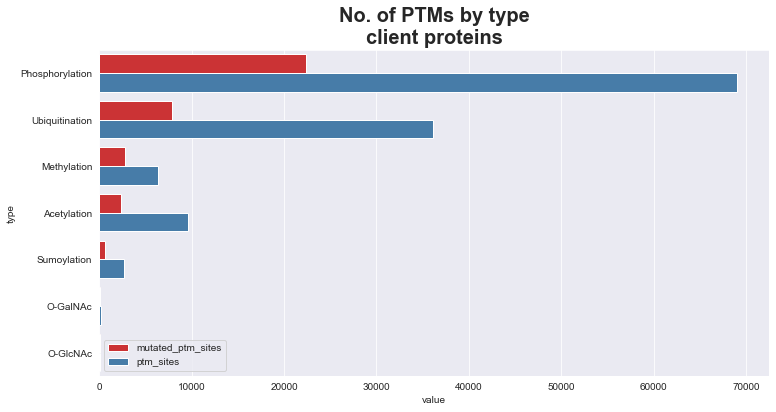

In [295]:
plt.figure(figsize= (12,6))
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.barplot(y= "type", x= "value", hue= "variable", data= clients_ptms_plot)
plt.title("No. of PTMs by type\nclient proteins", fontsize= 20, fontweight= 'bold')
plt.legend()
plt.show()

### Regulators

In [294]:
# First, all the regulator proteins
regulator_proteins = protein_roles[protein_roles.id_rol == 2]
regulator_proteins.shape

(357, 2)

In [296]:
# Second, all the mutated sites in regulator proteins
regulator_mutations = mutation[mutation.id_protein.isin(regulator_proteins.id_protein)][['id_protein', 'start_aa']].drop_duplicates()
regulator_mutations.shape

(87352, 2)

In [297]:
regulator_mutations.id_protein.nunique() # 353, ok

353

In [298]:
# Third, PTMs in regulator proteins
regulator_ptms = ptm[ptm.id_protein.isin(regulator_proteins.id_protein)][['id_protein', 'pos_aa', 'id_type']].drop_duplicates()
regulator_ptms.id_type = regulator_ptms.id_type.apply(int)
regulator_ptms

,id_protein,pos_aa,id_type
903,16,61,4
904,16,52,4
905,16,65,1
906,16,60,1
907,16,44,1
...,...,...,...
160685,5359,533,1
160686,5359,464,1
160687,5359,441,1
160688,5359,952,1


In [299]:
# Now add the column of mutation for each site
regulator_ptms = regulator_ptms.merge(regulator_mutations, left_on=['id_protein', 'pos_aa'], right_on= ['id_protein', 'start_aa'], how='left')
# replace mutations with boolean condition
cond = regulator_ptms.start_aa.notna()
regulator_ptms.loc[cond, "start_aa"] = True
regulator_ptms

,id_protein,pos_aa,id_type,start_aa
0,16,61,4,NaN
1,16,52,4,True
2,16,65,1,True
3,16,60,1,True
4,16,44,1,True
...,...,...,...,...
15899,5359,533,1,NaN
15900,5359,464,1,NaN
15901,5359,441,1,True
15902,5359,952,1,NaN


In [300]:
# no. of mutated ptm sites
regulators_ptms_plot = regulator_ptms[['id_type', 'start_aa']].value_counts().reset_index().rename(columns= {0: "mutated_ptm_sites"}).drop(columns= "start_aa")
# count no. of ptm sites by type
_ = regulator_ptms.groupby(["id_type"]).size().sort_values().reset_index().rename(columns= {0: "ptm_sites"})
regulators_ptms_plot = regulators_ptms_plot.merge(_).merge(type_ptm) # add labels (type_ptm)
regulators_ptms_plot = regulators_ptms_plot.drop(columns= "id_type").melt(id_vars= ['type'])
regulators_ptms_plot

,type,variable,value
0,Phosphorylation,mutated_ptm_sites,3036
1,Ubiquitination,mutated_ptm_sites,933
2,Methylation,mutated_ptm_sites,455
3,Acetylation,mutated_ptm_sites,279
4,Sumoylation,mutated_ptm_sites,112
5,O-GalNAc,mutated_ptm_sites,17
6,O-GlcNAc,mutated_ptm_sites,6
7,Phosphorylation,ptm_sites,9077
8,Ubiquitination,ptm_sites,4169
9,Methylation,ptm_sites,970


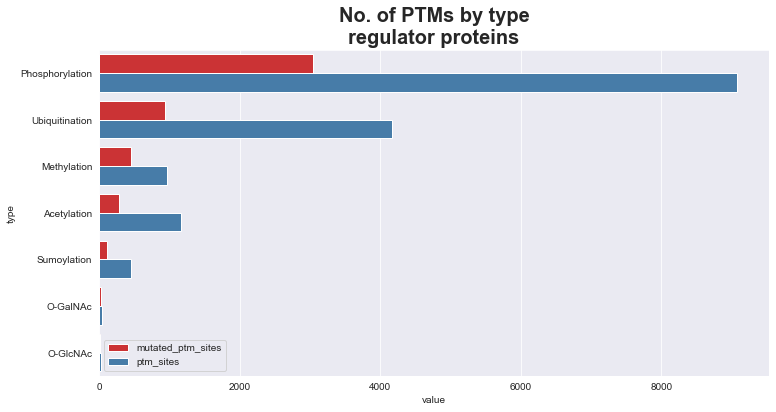

In [302]:
plt.figure(figsize= (12,6))
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.barplot(y= "type", x= "value", hue= "variable", data= regulators_ptms_plot)
plt.title("No. of PTMs by type\nregulator proteins", fontsize= 20, fontweight= 'bold')
plt.legend()
plt.show()

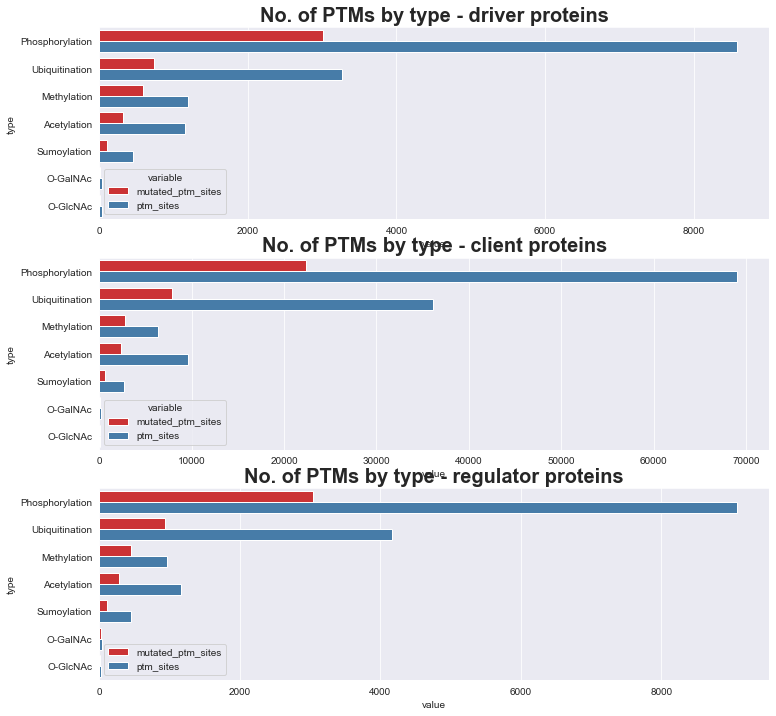

In [312]:
ax, fig = plt.subplots(3,1, figsize= (12,12))
sns.set_style('darkgrid')
sns.set_palette('Set1')
plt.subplot(3,1,1)
sns.barplot(y= "type", x= "value", hue= "variable", data= driver_ptms_plot)
plt.title("No. of PTMs by type - driver proteins", fontsize= 20, fontweight= 'bold')

plt.subplot(3,1,2)
sns.barplot(y= "type", x= "value", hue= "variable", data= clients_ptms_plot)
plt.title("No. of PTMs by type - client proteins", fontsize= 20, fontweight= 'bold')

plt.subplot(3,1,3)
sns.barplot(y= "type", x= "value", hue= "variable", data= regulators_ptms_plot)
plt.title("No. of PTMs by type - regulator proteins", fontsize= 20, fontweight= 'bold')

plt.legend()
plt.show()

## See it after..... map the PTMs to the mutated sites

Number of mutated sites that has PTMs

In [12]:
class_ptm

,class,id_class
0,general,1
1,regulatory,2
2,disease,3


In [13]:
type_ptm

,type,id_type
0,Phosphorylation,1
1,Acetylation,2
2,O-GalNAc,3
3,Methylation,4
4,Sumoylation,5
5,Ubiquitination,6
6,O-GlcNAc,7


In [14]:
ptm

,pos_aa,aa,mod,id_protein,id_class,id_type,id_ptm
0,42,S,p,1,3,1.0,1
1,439,S,p,1,1,1.0,2
2,462,S,p,1,1,1.0,3
3,468,Y,p,1,1,1.0,4
4,526,Y,p,1,1,1.0,5
...,...,...,...,...,...,...,...
165479,208,S,p,5741,1,1.0,165480
165480,182,S,p,5741,1,1.0,165481
165481,172,S,p,5741,1,1.0,165482
165482,2491,S,p,5741,1,1.0,165483


In [15]:
ptm.isna().any()

pos_aa        False
aa            False
mod           False
id_protein    False
id_class      False
id_type        True
id_ptm        False
dtype: bool

In [16]:
ptm[['id_protein', 'pos_aa']].duplicated().sum() # 17839, it means that 17839 sites have multiple PTMs

17839

In [17]:
ptm[['id_protein', 'pos_aa']][ptm[['id_protein', 'pos_aa']].duplicated()]

,id_protein,pos_aa
10,1,216
14,1,242
16,1,244
18,1,248
21,1,259
...,...,...
165297,5740,230
165300,5740,224
165405,5741,357
165428,5741,1247


In [18]:
ptm[ptm.id_protein == 1].sort_values("pos_aa")

,pos_aa,aa,mod,id_protein,id_class,id_type,id_ptm
31,7,T,p,1,1,1.0,32
95,11,T,p,1,2,1.0,96
32,11,T,p,1,1,1.0,33
91,19,T,gl,1,1,7.0,92
33,19,T,p,1,1,1.0,34
...,...,...,...,...,...,...,...
73,521,R,me,1,1,4.0,74
74,522,R,me,1,1,4.0,75
75,524,R,me,1,1,4.0,76
93,526,Y,p,1,2,1.0,94


In [19]:
# Now, only consider PTM sites, not the ammount of ptms
ptm[['id_protein', 'pos_aa']].drop_duplicates().sort_values(['id_protein', 'pos_aa'])

,id_protein,pos_aa
31,1,7
32,1,11
33,1,19
34,1,26
35,1,30
...,...,...
165475,5741,2681
165474,5741,2682
165430,5741,2684
165404,5741,2765


In [23]:
# this df is without the class category (general, regulatory, disease) to avoid duplicated PTMs
ptm_unique

,pos_aa,aa,mod,id_protein,id_type
0,42,S,p,1,1.0
1,439,S,p,1,1.0
2,462,S,p,1,1.0
3,468,Y,p,1,1.0
4,526,Y,p,1,1.0
...,...,...,...,...,...
165479,208,S,p,5741,1.0
165480,182,S,p,5741,1.0
165481,172,S,p,5741,1.0
165482,2491,S,p,5741,1.0


In [24]:
# how manty PTMs per protein
ptm_unique.groupby(["id_protein"]).size().sort_values()

id_protein
3606       1
3842       1
919        1
359        1
2532       1
        ... 
1461     409
2429     557
5665     753
5106    1061
2929    1150
Length: 4022, dtype: int64

In [114]:
# group the PTMs per type (Phosphorylation, Acetylation,O-GalNAc, etc...)
ptm.groupby(['id_protein', 'id_type']).size().sort_values()

id_protein  id_type
3190        2.0          1
1291        4.0          1
808         5.0          1
494         5.0          1
3158        4.0          1
                      ... 
2429        1.0        317
2929        1.0        369
            6.0        463
5665        1.0        699
5106        1.0        968
Length: 13645, dtype: int64

In [28]:
# bring all the mutated sites
# This df has each position mutated. Independently if that position has more than one mutation annotated
muts_unique_group

,id_protein,pos_aa
0,1,3
1,1,5
2,1,10
3,1,11
4,1,14
...,...,...
1236058,5741,2797
1236059,5741,2798
1236060,5741,2800
1236061,5741,2803


In [30]:
# How many mutations per protein
muts_unique_group.groupby("id_protein").size().sort_values()

id_protein
3728        1
2641        1
3756        1
4077        1
3757        1
        ...  
1351     3341
3450     3384
3355     3519
2358     4692
5106    15279
Length: 5579, dtype: int64

In [34]:
# Dataframe with rol for each protein. No considering unassigned
# must have the cols: id_protein, rol, type_ptm, no_ptms_in_mutated_sites
ptm_mutated = protein_has_mlo[['id_protein', 'id_rol']].drop_duplicates().dropna()
ptm_mutated.id_rol = ptm_mutated.id_rol.apply(int)
ptm_mutated

,id_protein,id_rol
0,1,1
21,2,1
41,3,1
52,4,1
72,5,1
...,...,...
11440,5685,1
11449,5690,3
11470,5708,3
11499,5727,3


In [39]:
dri = list_roles(protein_has_mlo, 1)
reg = list_roles(protein_has_mlo, 2)
cli = list_roles(protein_has_mlo, 3)

In [45]:
# with open("cients.txt", "w") as output:
#     output.write(str(cli))

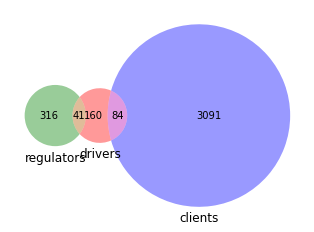

In [42]:
venn3([set(dri), set(reg), set(cli)], set_labels= ['drivers', 'regulators', 'clients'])

In [47]:
# Now add the type of PTM
ptms_unique = ptm[['id_protein', 'id_type', 'pos_aa']].drop_duplicates()
ptms_unique

,id_protein,id_type,pos_aa
0,1,1.0,42
1,1,1.0,439
2,1,1.0,462
3,1,1.0,468
4,1,1.0,526
...,...,...,...
165479,5741,1.0,208
165480,5741,1.0,182
165481,5741,1.0,172
165482,5741,1.0,2491


In [48]:
# Find all the mutated positions that have PTMs. Consider only mutated positions.
mutated_sites = mutation[['id_protein', 'start_aa']].drop_duplicates()
mutated_sites

,id_protein,start_aa
0,3155,442
1,3155,480
2,3155,500
3,3155,503
4,3155,69
...,...,...
1660052,4348,789
1660053,4348,1328
1660054,4349,337
1660057,4362,400


In [49]:
# These are the mutated sites in PTM sites
mutated_sites_in_ptm = mutated_sites[mutated_sites.id_protein.isin(ptms_unique.id_protein)]
mutated_sites_in_ptm

,id_protein,start_aa
0,3155,442
1,3155,480
2,3155,500
3,3155,503
4,3155,69
...,...,...
1660042,4341,94
1660044,4341,77
1660045,4341,114
1660057,4362,400


In [50]:
# No. of residues mutated that has PTMs
mutated_sites_in_ptm.shape[0] / mutated_sites.shape[0]

0.7553805914423456

In [69]:
# Protein roles
protein_has_mlo[['id_protein', 'id_rol']]

,id_protein,id_rol
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
11514,5739,NaN
11515,5740,NaN
11516,5740,NaN
11517,5741,3.0


In [73]:
mutation[mutation.id_protein == 16].sort_values('start_aa')[:30]

,id_mutation,snp_id,chromosome,start_genomic,end_genomic,start_aa,end_aa,notation_cds,notation_aa,id_protein,id_consequence
294395,294396,NaN,11,111912835.0,111912835.0,2,2,c.6G>A,p.S2=,16,2
823685,823686,NaN,11,111912840.0,111912840.0,4,4,c.11G>A,p.R4H,16,1
294399,294400,NaN,11,111912847.0,111912847.0,6,6,c.18G>T,p.V6=,16,2
823675,823676,NaN,11,111912849.0,111912849.0,7,7,c.20C>A,p.P7Q,16,1
823688,823689,NaN,11,111912858.0,111912858.0,10,10,c.29A>T,p.H10L,16,1
823696,823697,NaN,11,111912866.0,111912866.0,13,13,c.37A>G,p.T13A,16,1
823705,823706,NaN,11,111912872.0,111912872.0,15,15,c.43G>A,p.E15K,16,1
823689,823690,NaN,11,111912876.0,111912876.0,16,16,c.47A>C,p.Y16S,16,1
823715,823716,NaN,11,111912884.0,111912884.0,19,19,c.55G>T,p.A19S,16,1
823700,823701,NaN,11,111912897.0,111912897.0,23,23,c.68G>T,p.R23L,16,1


In [60]:
# Protein roles
protein_has_mlo[['id_protein', 'id_rol']].dropna().id_rol.value_counts()

3.0    4138
1.0     716
2.0     640
Name: id_rol, dtype: int64

In [61]:
# Protein roles not considering duplicated
protein_has_mlo[['id_protein', 'id_rol']].dropna().drop_duplicates().id_rol.value_counts()

3.0    3175
2.0     357
1.0     285
Name: id_rol, dtype: int64

In [68]:
# How many unique proteins are Drivers
protein_has_mlo[(protein_has_mlo.id_rol == 1)].id_protein.nunique() # 285, ok!

285

In [58]:
ptm.id_type.value_counts()

1.0    94547
6.0    44739
2.0    12414
4.0     9409
5.0     3872
3.0      281
7.0      217
Name: id_type, dtype: int64

In [ ]:
# First try all vs all


In [ ]:
# Now classify the proteins by their role